In [6]:
%matplotlib widget
%matplotlib inline
from IPython.display import HTML

import numpy as np
from scipy.spatial.distance import pdist, squareform

import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
import pandas as pd

In [7]:
"load reference data from other files"
"link length"
link_length = np.load('linklength.npy')

In [8]:
numfile = 10
nummarker = 11
fileof = 0

"DICTIONARY xat: x position of marker i (key) at column k (value)"
xat = {
    1:8,2:11,3:14,4:17,5:20,6:23,7:26,8:29,9:32,10:2,11:5
}
"FUNCTION yat: y position of marker i at column k (xat+1)"
def yat(key):
    return xat[key]+1

timestampS = [[]]*numfile
dfS = [[]]*numfile


In [9]:
"get xy position of nth frame of file df. i: the marker i"
def get_markerpos_of(df, i, n = 0):
    return np.asarray([df.iat[n,xat[i]], df.iat[n, yat(i)]], dtype="float")

def get_pos_of_alljoints(dfS, k, n = 0):
    
    alljoints = []
    "in file dfS, choose a specific motion k"
    "get nth frame"
    for j in range(0, 11):
        alljoints.append(get_markerpos_of(dfS[k], j+1, n))
    
    alljoints = np.asarray(alljoints, dtype="float")
    return alljoints
        
    

In [10]:
class BioMotion:
    """
    Biological Motion class
    
    init_state is an [N x 3] array, where N is the number of joints:
    [[x1, y1, type],
     [x2, y2, type],
     ...    ]
     
    dataframe is the dataframe we use.
    index is the start frame of the motion.
    whichmotion is the motion #n.
    """
    def __init__(self,
                 init_state = [[0, 0, 1],
                               [0.5, 0.5, 1],
                               [0.5, 1.0, 1]],
                 dataframes = pd.DataFrame(),
                 index = 1,
                 whichmotion = 0):
        self.init_state = np.asarray(init_state, dtype=float)
        self.state = self.init_state.copy()
        self.frame_elapsed = 0
        self.index = index
        self.dataframes = dataframes
        self.whichmotion = whichmotion
    def step(self, dn):
        # self.state = np.random.rand(10,2)
        "next frame = index + dn"
        self.index = self.index + dn
        if(self.index>=len(self.dataframes[self.whichmotion])):
            self.index = self.index - 1
        "state := get postion of next frame"
        self.state = get_pos_of_alljoints(self.dataframes, self.whichmotion, self.index)
    
    def reset(self):
        self.index = 0

The video is robot fascia for Mtallj1 is made.


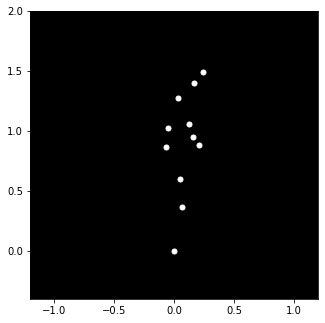

In [11]:
"init: start frame index #n"
dfN = [[]]*numfile
len(dfN)

rn = 0

dfN[rn] = pd.read_csv('optimization_result/SGD/Oallj_2-0.csv')

idx = 0
"get position of n"
init_state = get_pos_of_alljoints(dfN, rn, idx)
robot = BioMotion(init_state, dfN, idx, rn)
robot.reset()

"set up figure and animation"
fig = plt.figure()
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-1.2, 1.2), ylim=(-0.4, 2.0))
ax = plt.gca()

"set facecolor black"
ax.set_facecolor("black")

motions, = ax.plot([], [], 'bo', ms=5, c="white")

def init():
    global robot
    motions.set_data([], [])
    return motions,

def animate(i):
    global robot, ax, fig

    robot.step(1)
    ms = 5
    "update pieces of the animation"
    motions.set_data(robot.state[:,0], robot.state[:,1])
    motions.set_markersize(ms)

    return motions,

ani = animation.FuncAnimation(fig, animate, frames=len(dfN[rn]),
                              interval=8.333, blit=True, init_func=init)
"interval = 8.33ms for reconstructing 120fps motion"
#     plt.show()
"This video is reconstructed motion from human angles"
ani.save('clips/SGD/robotm8'+str(rn+1)+'.mp4', fps=120, extra_args=['-vcodec', 'libx264'])

print("The video is robot fascia for Mtallj"+str(rn+1)+" is made.")